#Laboratorio Calificado N° 1: Visión Computacional
Integrantes:
- Mateo Tapia Chasquibol
- Sebastian Lopez Medina

# Ejercicio 1: Segmentación de frutas por color (RGB y HSV)
A partir de una imagen de frutas de diferentes colores, el objetivo es segmentar las manzanas o las uvas utilizando umbrales de color en los espacios de color RGB y HSV.

## Importacion de librerias y carga de imagen

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image


In [16]:
image_url_fruits = "https://e00-expansion.uecdn.es/assets/multimedia/imagenes/2022/06/06/16545451548678.jpg"

In [17]:
# hacemos request get del url y leemos en memoria la imagen
response = requests.get(image_url_fruits)
img_array = np.array(Image.open(BytesIO(response.content)))

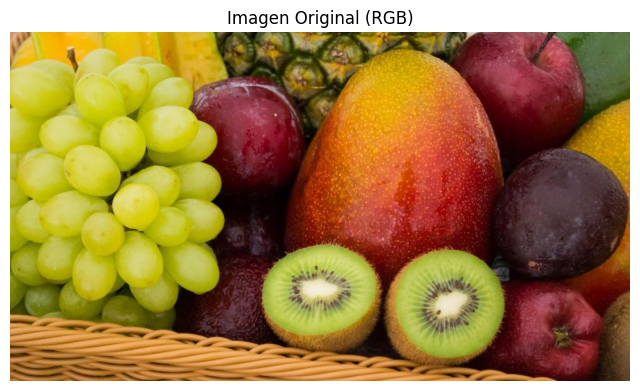

In [18]:
# asumiendo que img_array de PIL ya es RGB
img_rgb = img_array

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Imagen Original (RGB)")
plt.axis('off')
plt.show()

## Conversion a HSV

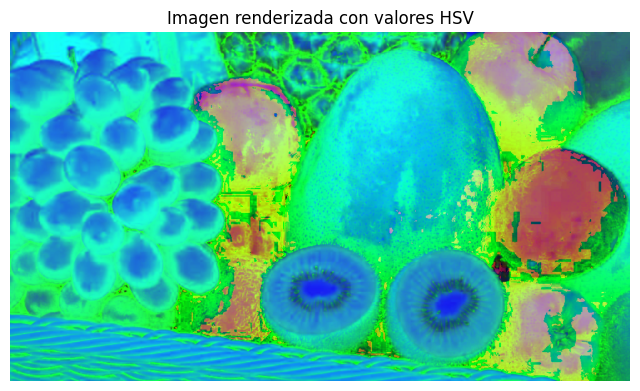

In [9]:
#cvtcolor para cambiar el espacio de color
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(8, 6))
plt.imshow(img_hsv)
plt.title("Imagen renderizada con valores HSV")
plt.axis('off')
plt.show()

## Visualizacion individual de cada banda

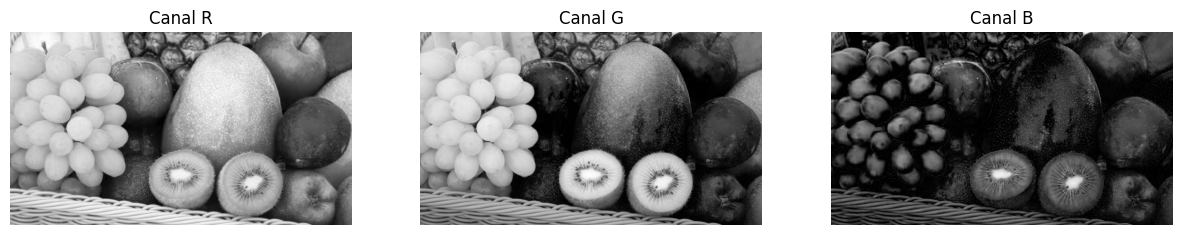

In [11]:
# en RGB
# se usa split para dividir los canales del espectro
R, G, B = cv2.split(img_rgb)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray')
plt.title("Canal R")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray')
plt.title("Canal G")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title("Canal B")
plt.axis('off')
plt.show()

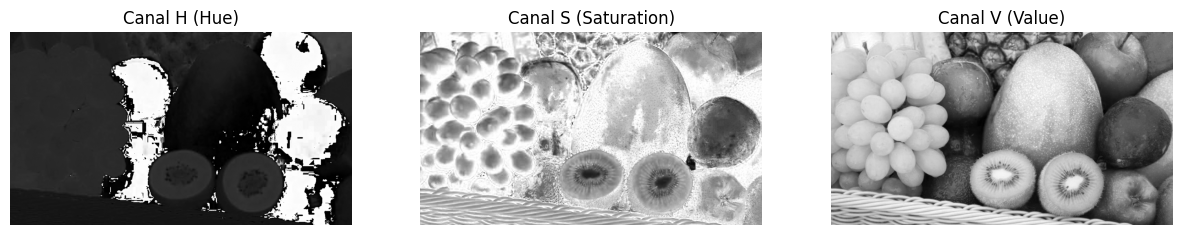

In [13]:
# en HSV
# se usa split para dividir los canales del espectro
H, S, V = cv2.split(img_hsv)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray')
plt.title("Canal H (Hue)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray')
plt.title("Canal S (Saturation)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray')
plt.title("Canal V (Value)")
plt.axis('off')
plt.show()

## Experimentacion con umbrales para segmentacion de frutas

Para este experimento lo hare con el kiwi en el espectro HSV

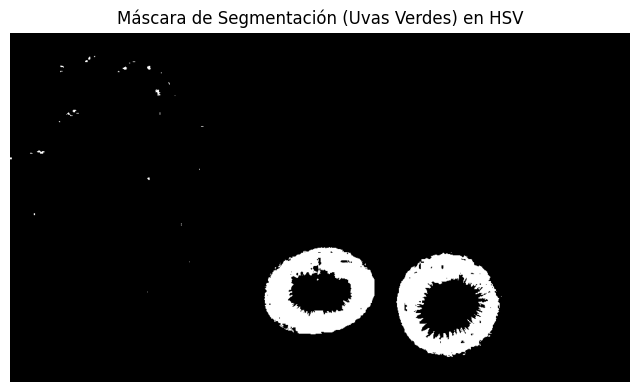

In [172]:
# bounds para filtrar una parte del kiwi (dentro del kiwi pero no en el centro)
lower_green_hsv = np.array([32, 0, 170])
upper_green_hsv = np.array([40, 180, 255])

# creamos la mascara en HSV
mask_hsv = cv2.inRange(img_hsv, lower_green_hsv, upper_green_hsv)


plt.figure(figsize=(8, 6))
plt.imshow(mask_hsv, cmap='gray')
plt.title("Máscara de Segmentación (Kiwi Capa 1) en HSV")
plt.axis('off')
plt.show()

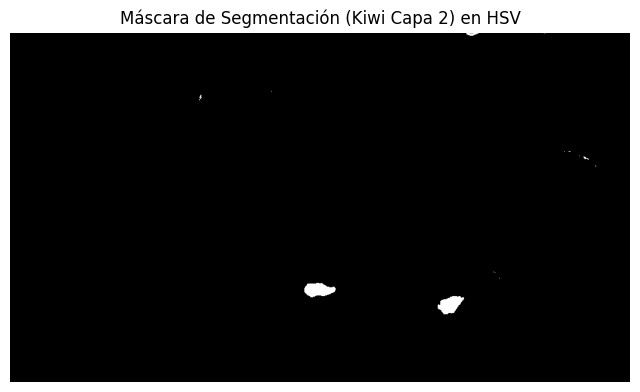

In [225]:
# para el centro del kiwi cortado
lower_green_hsv_2 = np.array([0, 0, 100])
upper_green_hsv_2 = np.array([50, 50, 255])

# creamos la mascara en HSV
mask_hsv_2 = cv2.inRange(img_hsv, lower_green_hsv_2, upper_green_hsv_2)

plt.figure(figsize=(8, 6))
plt.imshow(mask_hsv_2, cmap='gray')
plt.title("Máscara de Segmentación (Kiwi Capa 2) en HSV")
plt.axis('off')
plt.show()

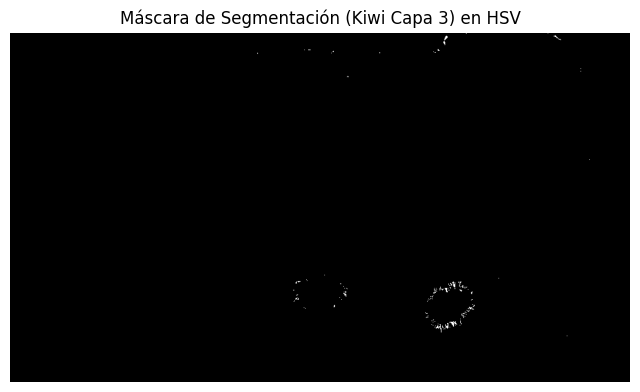

In [226]:
# para la parte de las semillas del kiwi
lower_green_hsv_3 = np.array([15, 40, 100])
upper_green_hsv_3 = np.array([25, 90, 140])

# creamos la mascara en HSV
mask_hsv_3 = cv2.inRange(img_hsv, lower_green_hsv_3, upper_green_hsv_3)

plt.figure(figsize=(8, 6))
plt.imshow(mask_hsv_3, cmap='gray')
plt.title("Máscara de Segmentación (Kiwi Capa 3) en HSV")
plt.axis('off')
plt.show()

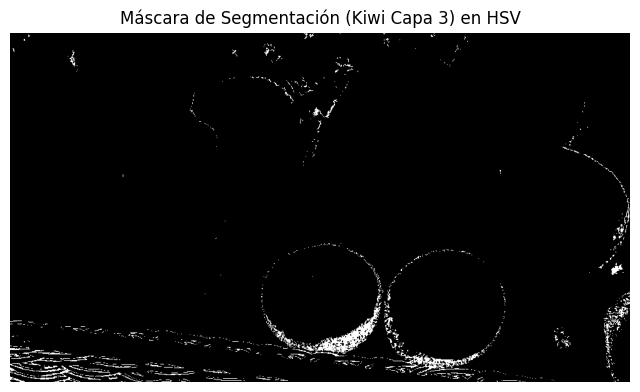

In [360]:
#para la parte externa del kiwi con la cacscara
lower_green_hsv_4 = np.array([10, 190, 50])
upper_green_hsv_4 = np.array([20, 220, 160])

# creamos la mascara en HSV
mask_hsv_4 = cv2.inRange(img_hsv, lower_green_hsv_4, upper_green_hsv_4)

plt.figure(figsize=(8, 6))
plt.imshow(mask_hsv_4, cmap='gray')
plt.title("Máscara de Segmentación (Kiwi Capa 3) en HSV")
plt.axis('off')
plt.show()

Se unen las 4 capas secuencialmente para mostrar el kiwi

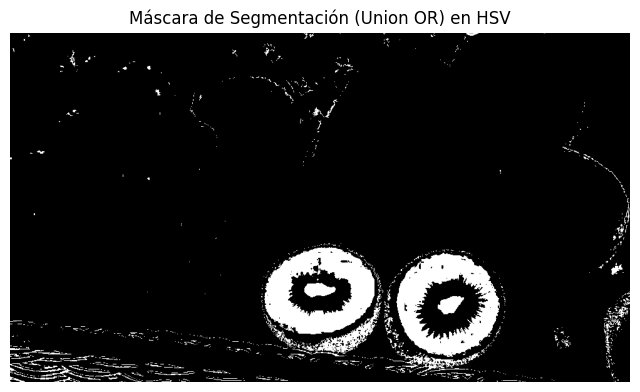

In [373]:
#se unen todos los resultados auqnue no sea perfecto, se logra ver un kiwi
mask_kiwi_combined = cv2.bitwise_or(mask_hsv, mask_hsv_2)
mask_kiwi_combined = cv2.bitwise_or(mask_kiwi_combined, mask_hsv_3)
mask_kiwi_combined = cv2.bitwise_or(mask_kiwi_combined, mask_hsv_4)
plt.figure(figsize=(8, 6))
plt.imshow(mask_kiwi_combined, cmap='gray')
plt.title("Máscara de Segmentación (Union OR) en HSV")
plt.axis('off')
plt.show()

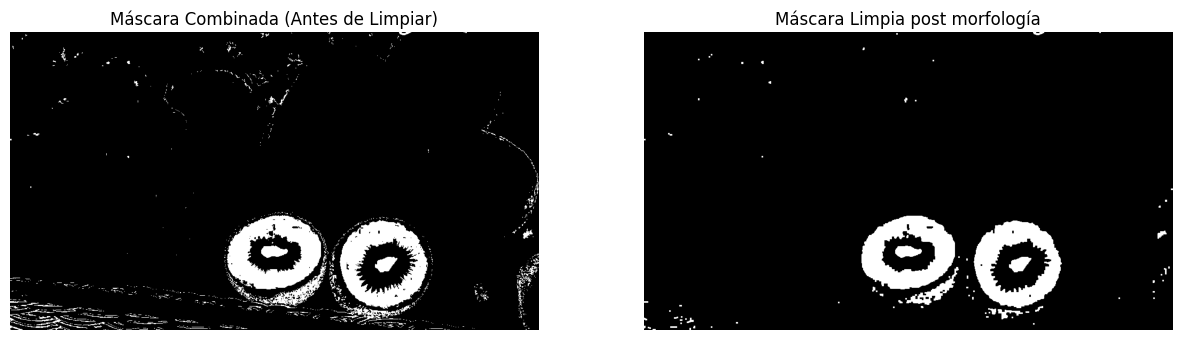

In [374]:
kernel = np.ones((3, 3), np.uint8)

mask_cleaned = cv2.morphologyEx(mask_kiwi_combined, cv2.MORPH_OPEN, kernel)

mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask_kiwi_combined, cmap='gray')
plt.title("Máscara Combinada (Antes de Limpiar)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_cleaned, cmap='gray')
plt.title("Máscara Limpia post morfología")
plt.axis('off')

plt.show()

## Visualizamos imagen original y máscara

Tratamos de ver si se podia salvar el ruido extra usando kernels para limpiar la imagen

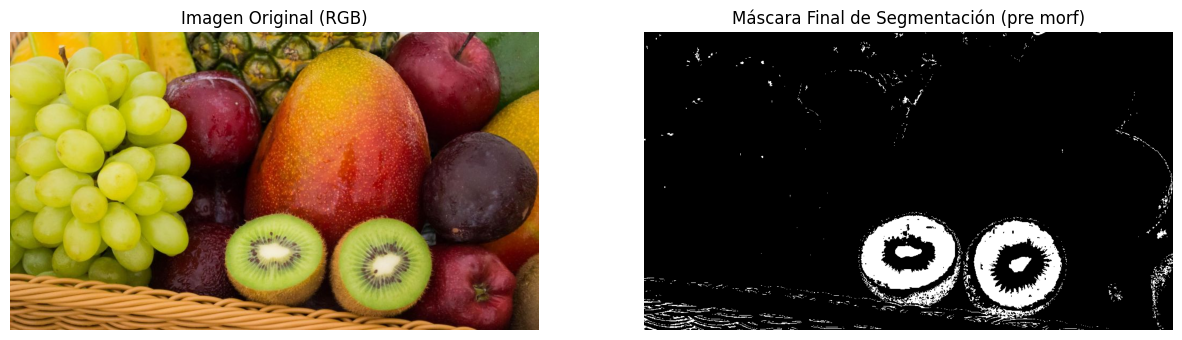

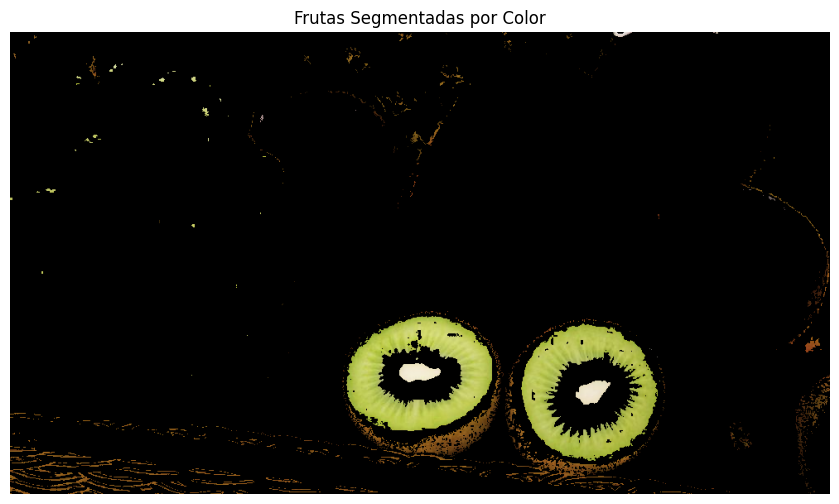

In [377]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_kiwi_combined, cmap='gray')
plt.title("Máscara Final de Segmentación (pre morf)")
plt.axis('off')
plt.show()

segmented_fruits_no_morph = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_kiwi_combined)

plt.figure(figsize=(15, 6))
plt.imshow(segmented_fruits_no_morph)
plt.title("Frutas Segmentadas por Color")
plt.axis('off')
plt.show()

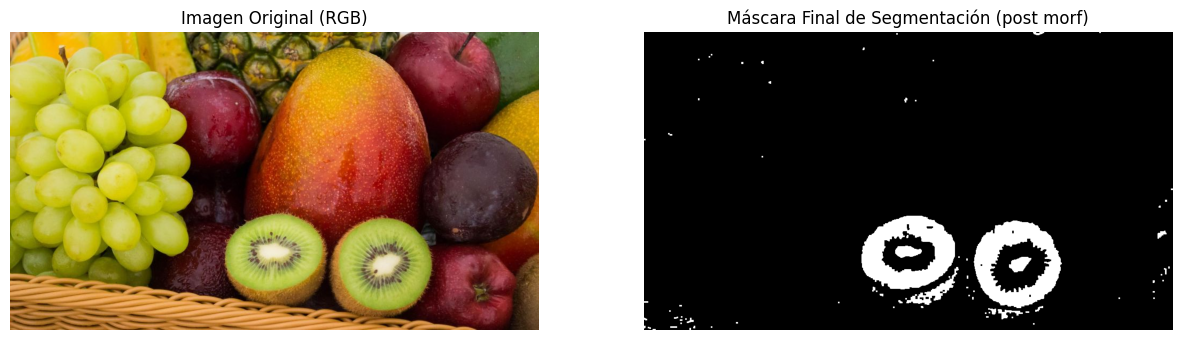

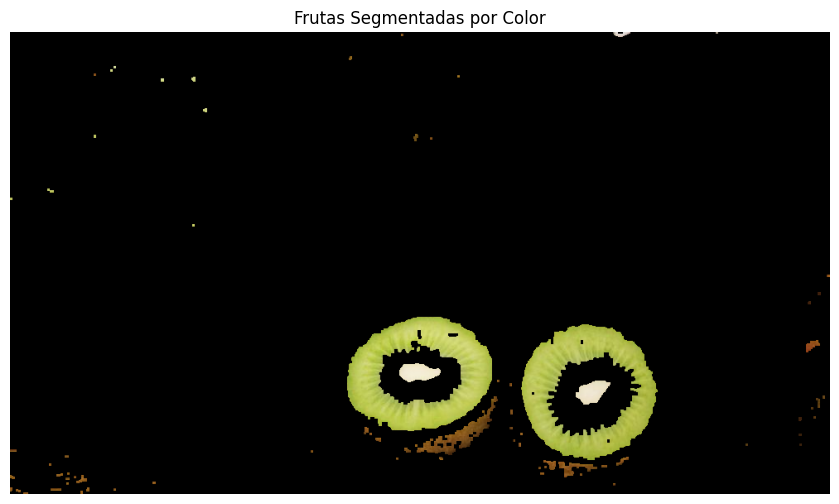

In [378]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask_cleaned, cmap='gray')
plt.title("Máscara Final de Segmentación (post morf)")
plt.axis('off')
plt.show()

segmented_fruits_post_morph = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_cleaned)

plt.figure(figsize=(15, 6))
plt.imshow(segmented_fruits_post_morph)
plt.title("Frutas Segmentadas por Color")
plt.axis('off')
plt.show()

- Explicar el criterio empleado para segmentar la fruta y responder la pregunta
de reflexión.

Para esta fruta lo que hicimos fue segmentar y caracterizarla por varias partes. Debido a que el kiwi es complejo y tiene mas de un color y tonalidad, sentimos que seria bueno para mostrar la capacidad que tiene combinar mascaras para mejorar el resultado final.

En ese sentido, se segmentaron:
- el centro del kiwi (valores altos de value y bajos de saturacion con el hue correcto)
- la pulpa del kiwi (hue verde y valores medianos de saturacion y value)
- la cascara del kiwi (valores bajos de hue para tonos verdosos-marrones, altos de saturacion y medianos en value).

- ¿Qué ventajas observas al trabajar en HSV frente a RGB para segmentar
colores?

En HSV, el tono o hue aisla el color de la luminosidad (value) y la saturación, lo que significa que puedes definir un rango de color (en este caso, verde o verde-marron) sin preocuparte tanto por si la fruta está en la sombra o bien iluminada. En RGB, un mismo "verde" puede tener valores R, G, B muy diferentes dependiendo de la iluminación, lo que dificulta establecer un único umbral para el color. En ese sentido, el HSV es mas apropiado en estos casos de segmentacion de color.

# Ejercicio 2: Detección de bordes en radiografía


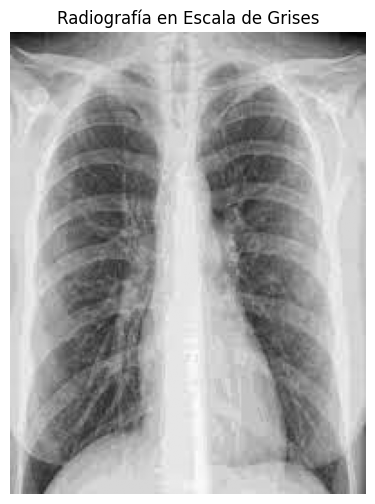

In [380]:
image_url_xray = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRf-PVoLAMfM6QoLqPHdHwYd96kjvCH297jN4xTLMxb_Nt1WUhI1OkdlxuZ6ZVjt41H-4k&usqp=CAU"

response_xray = requests.get(image_url_xray)
img_array_xray = np.array(Image.open(BytesIO(response_xray.content)))

#convirtiendo a escala de grises con el if

if len(img_array_xray.shape) == 3:
    img_gray = cv2.cvtColor(img_array_xray, cv2.COLOR_RGB2GRAY)
else:
    img_gray = img_array_xray

plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Radiografía en Escala de Grises")
plt.axis('off')
plt.show()

## Aplicar filtros para reducción de ruido

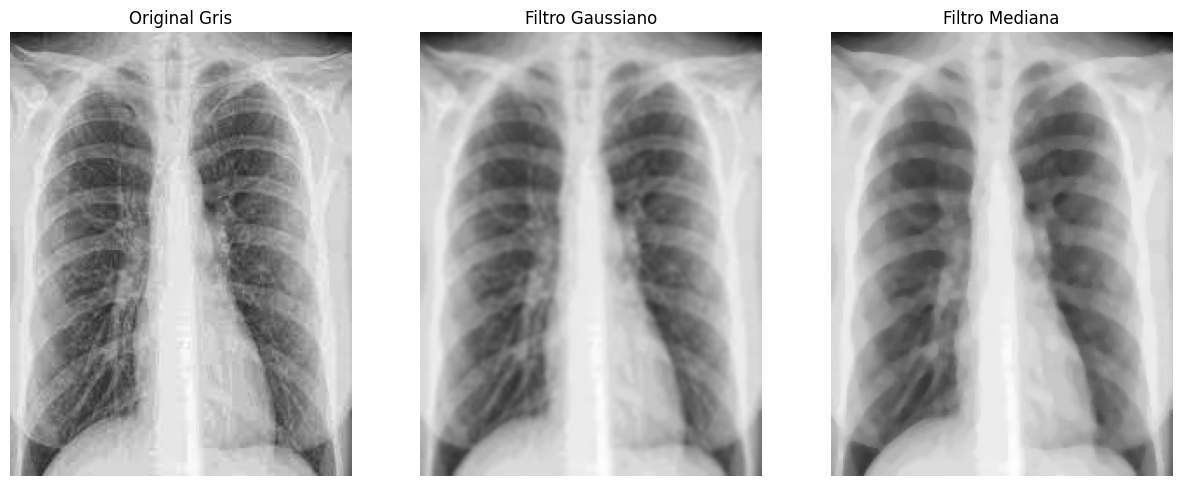

In [413]:
# Filtro Gaussiano
img_gaussian = cv2.GaussianBlur(img_gray, (5, 5), 0) # Kernel size (5,5), sigmaX=0

# Filtro Mediana
img_median = cv2.medianBlur(img_gray, 5) # Kernel size 5x5

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Gris")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gaussian, cmap='gray')
plt.title("Filtro Gaussiano")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_median, cmap='gray')
plt.title("Filtro Mediana")
plt.axis('off')
plt.show()

# elegimos una imagen filtrada para la deteccion de bordes
img_preprocessed = img_median

## Aplicar los operadores Sobel y Canny para la detección de bordes

In [414]:
# Operador Sobel
# Gradiente en X
sobelx = cv2.Sobel(img_preprocessed, cv2.CV_64F, 1, 0, ksize=5)
# Gradiente en Y
sobely = cv2.Sobel(img_preprocessed, cv2.CV_64F, 0, 1, ksize=5)

# Magnitud del gradiente
sobel_combined = cv2.magnitude(sobelx, sobely)
# Normalizar para visualización
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


## Visualizar resultados y comparar

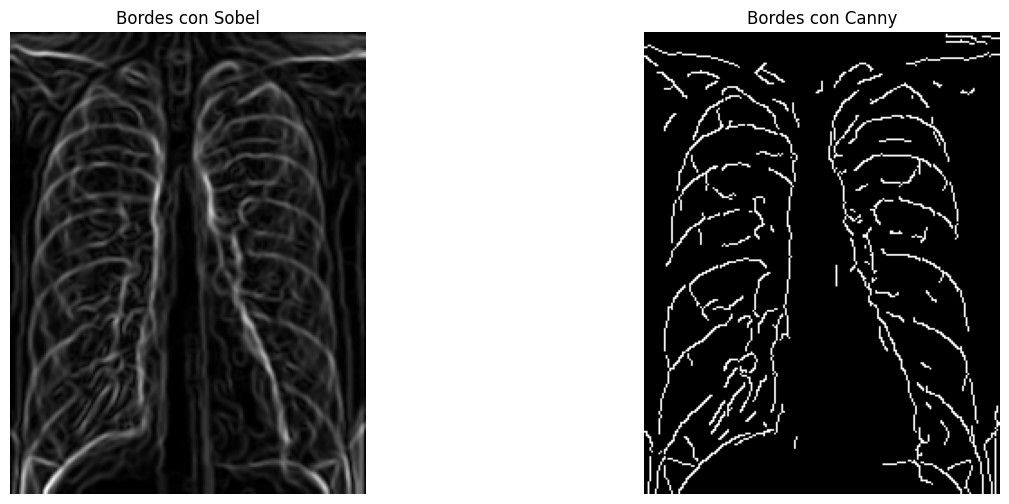

In [415]:
# Operador Canny
edges_canny = cv2.Canny(img_preprocessed, 75, 110)


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Bordes con Sobel")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title("Bordes con Canny")
plt.axis('off')
plt.show()

- Explicar el criterio empleado para seleccionar el/los filtro(s) y el operador de bordes, y responder a la pregunta de reflexión.


Se eligio Mediana porque para este tipo de ruidos/imagenes sentiamos que permitia una mejor diferenciacion de zonas o de estructuras en la radiografia en comparacion del filtro Gaussiano. No obstante, el filtro gaussiano puede ser mejor en ciertas zonas, especificamente por los surcos dentro de los pulmones.

Para el caso de operador de bordes, Canny produce bordes mas limpios y mejor conectados, lo cual es preferible para resaltar estas estructuras. Sobel es más sensible al ruido y puede generar bordes mas gruesos.

# Ejercicio 3: Segmentación de señales de tránsito por color y bordes

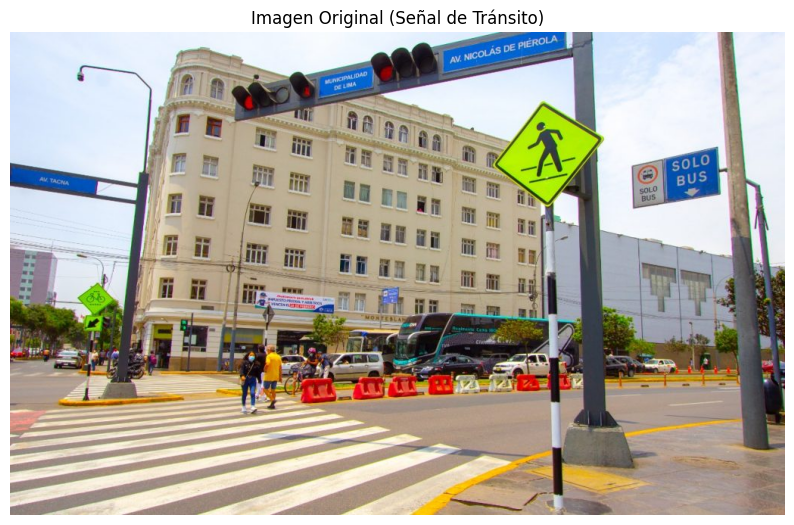

In [417]:
image_url_traffic_sign = "https://cdn.www.gob.pe/uploads/document/file/2796606/semaforo-mantenimiento%20muni%20lima.jpg.jpg"

response_sign = requests.get(image_url_traffic_sign)
img_array_sign = np.array(Image.open(BytesIO(response_sign.content)))
img_rgb_sign = img_array_sign

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb_sign)
plt.title("Imagen Original (Señal de Tránsito)")
plt.axis('off')
plt.show()

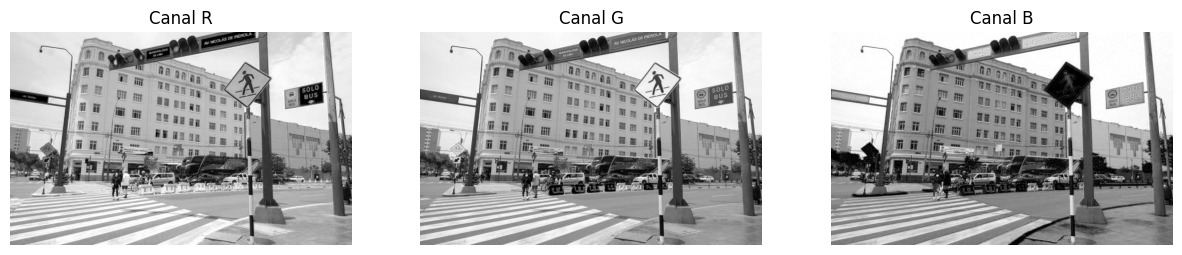

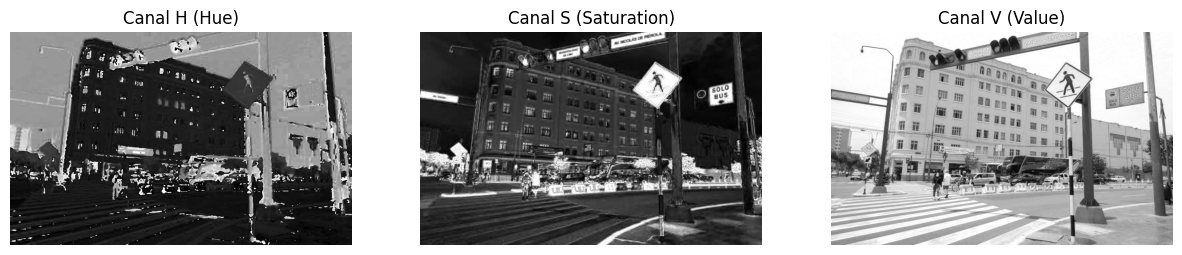

In [419]:
img_hsv_sign = cv2.cvtColor(img_rgb_sign, cv2.COLOR_RGB2HSV)
# Canales RGB
R, G, B = cv2.split(img_rgb_sign)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='gray')
plt.title("Canal R")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='gray')
plt.title("Canal G")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='gray')
plt.title("Canal B")
plt.axis('off')
plt.show()

# Canales HSV
H, S, V = cv2.split(img_hsv_sign)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap='gray') # Hue channel often shown in grayscale
plt.title("Canal H (Hue)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(S, cmap='gray') # Saturation channel
plt.title("Canal S (Saturation)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(V, cmap='gray') # Value channel
plt.title("Canal V (Value)")
plt.axis('off')
plt.show()